# Calculate percentage changes, lags, and shifts on time series

Typical applications include sensor data, financial assets, and shopping behaviours to study cyclical events.

Credits to datacamp.

In [2]:
# import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

sns.set_style("darkgrid")
%config InlineBackbend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["legend.loc"] = "upper left"

In [16]:
# read data file into dataframe

df = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")
df.head()

,Close
Date,
2016-06-24,32.229603
2016-06-27,32.068310
2016-06-28,32.675522
2016-06-29,33.216320
2016-06-30,33.406071


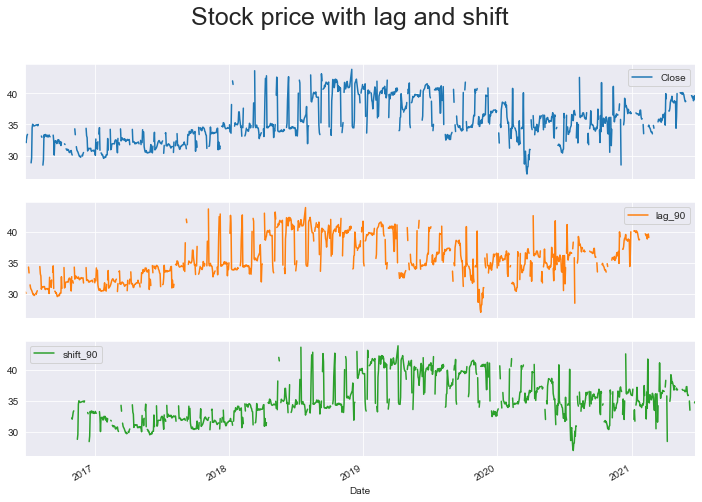

In [17]:
# Set data frequency to business daily
df = df.asfreq("B")

# Create "lagged" and "shifted" data series
df["lag_90"] = df["Close"].shift(-90)       # create a lag (backward)
df["shift_90"] = df["Close"].shift(90)      # create a shift (forward)

# plot the price series
df.plot(subplots = True, legend = True)
plt.suptitle("Stock price with lag and shift", size = 25)
plt.show()

# drop newly-created rows
df.drop(["lag_90", "shift_90"], axis = 1, inplace = True)

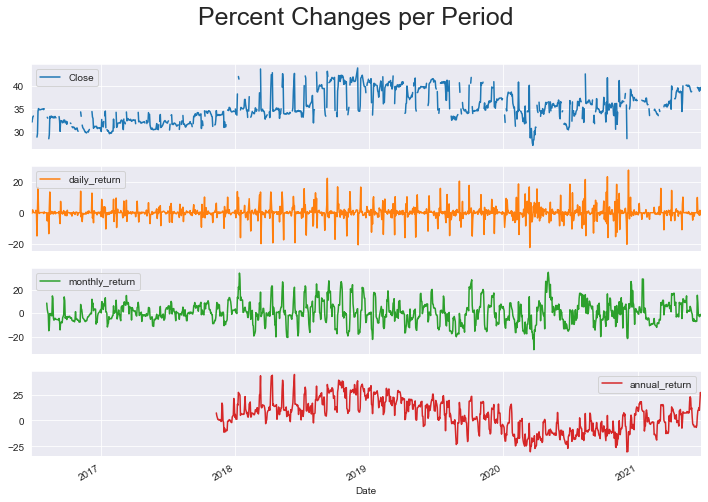

In [18]:
# create daily_return
df["daily_return"] = df["Close"].pct_change(1).mul(100)

# create monthly_return
df["monthly_return"] = df["Close"].pct_change(30).mul(100)

# create annual_return
df["annual_return"] = df["Close"].pct_change(360).mul(100)

# plot percentage changes per period
df.plot(subplots = True)
plt.suptitle("Percent Changes per Period", size = 25)
plt.show()